In [12]:
import pandas as pd
import matplotlib.pyplot as plot

from sklearn.linear_model import LinearRegression
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
type(data)
data.columns = ['TV', 'Radio', 'Newspaper', 'Sales']
data.head()

The scikit-learn version is 0.20.2.


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


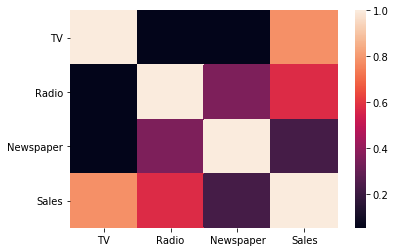

In [3]:
import seaborn as sns
sns.heatmap(data.corr())

In [6]:
data.shape

(200, 4)

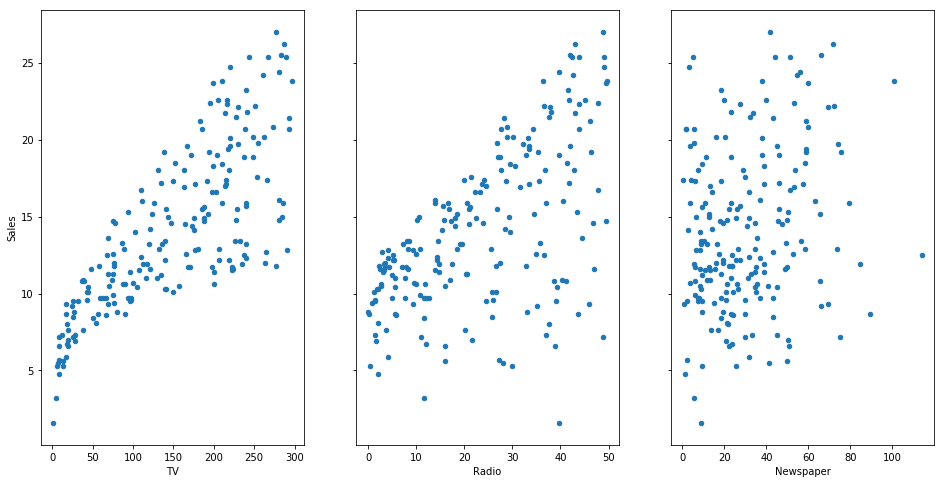

In [7]:
fig, axs = plot.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

In [8]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


In [13]:
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 12 Jan 2019   Prob (F-statistic):           1.58e-96
Time:                        20:24:42   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
lm = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()
lm.rsquared

0.8971942610828957

In [15]:
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.rsquared

0.8972106381789522

[0.87841656 0.91396029 0.90508856 0.8438298  0.8950119  0.90321822]
0.890974408977029


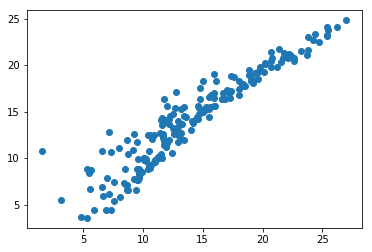

In [50]:
# cross validation with K-Fold

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform 6 fold cross validation
scores = cross_val_score(lm, X, y, cv=6)
print(scores)

predictions = cross_val_predict(lm, X, y, cv=6)
plot.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print(accuracy)

# kfold = KFold(3, True, 1)
# kscores = []

# for train_index, test_index in kfold.split(X,y):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#     lm = LinearRegression()
#     lm.fit(X_train, y_train)

#     # print intercept and coefficients
#     print(lm.intercept_)
#     print(lm.coef_)
#     score = cross_val_score(lm, X_train, y_train, scoring=None, cv=10)
#     kscores.append(score.mean())

# print(kscores)
